In [1]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose
import glob

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Nose coordinates: (1056.6990375518799, 1111.810803413391)


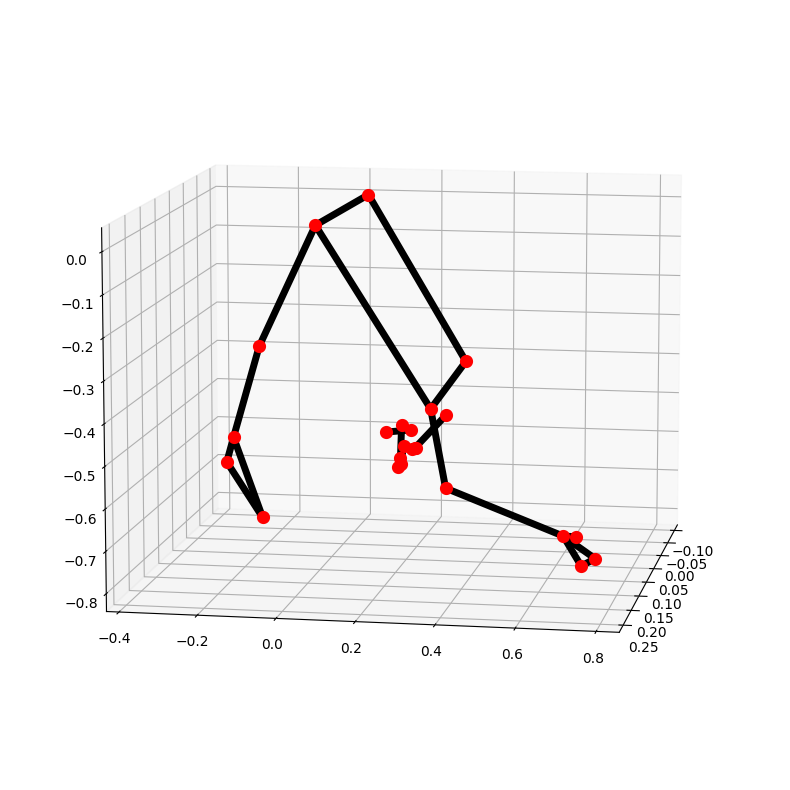

Nose coordinates: (2301.1218481063843, 468.7248657941818)


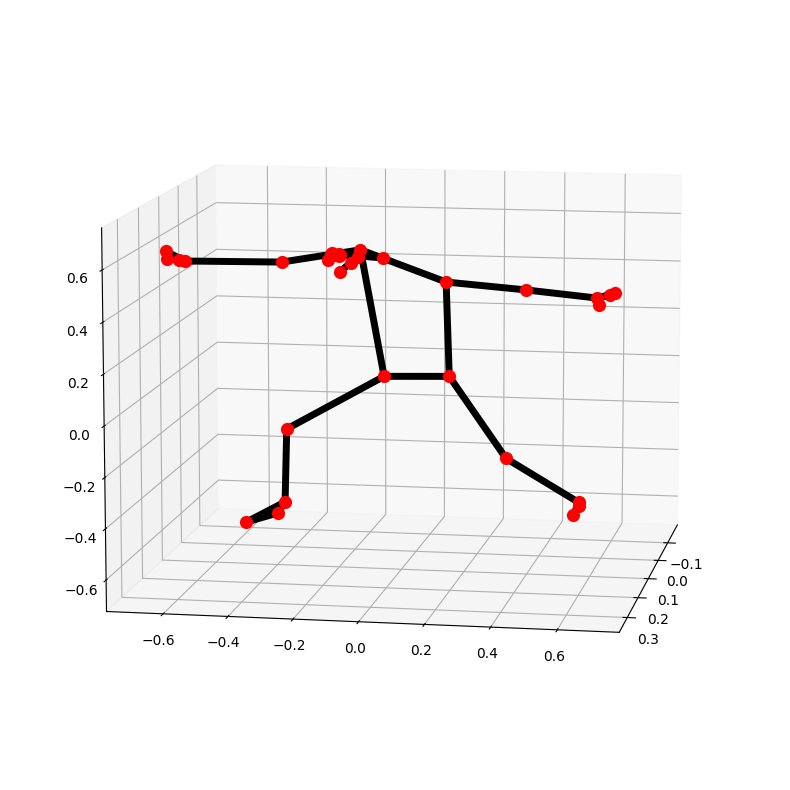

Nose coordinates: (3495.289206504822, 820.6573724746704)


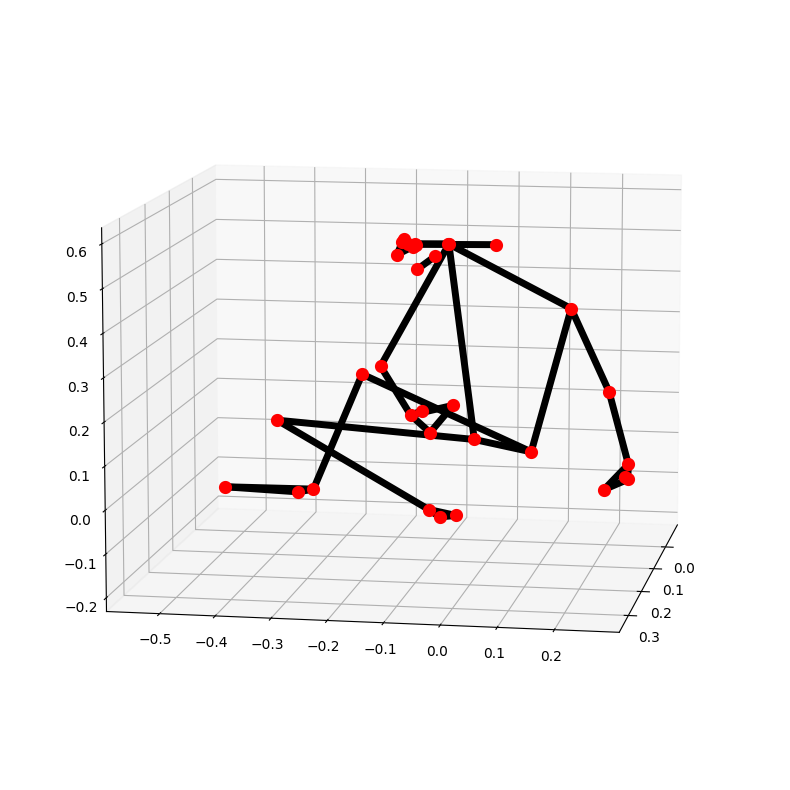

Nose coordinates: (2589.6943313479424, 1649.2541811168194)


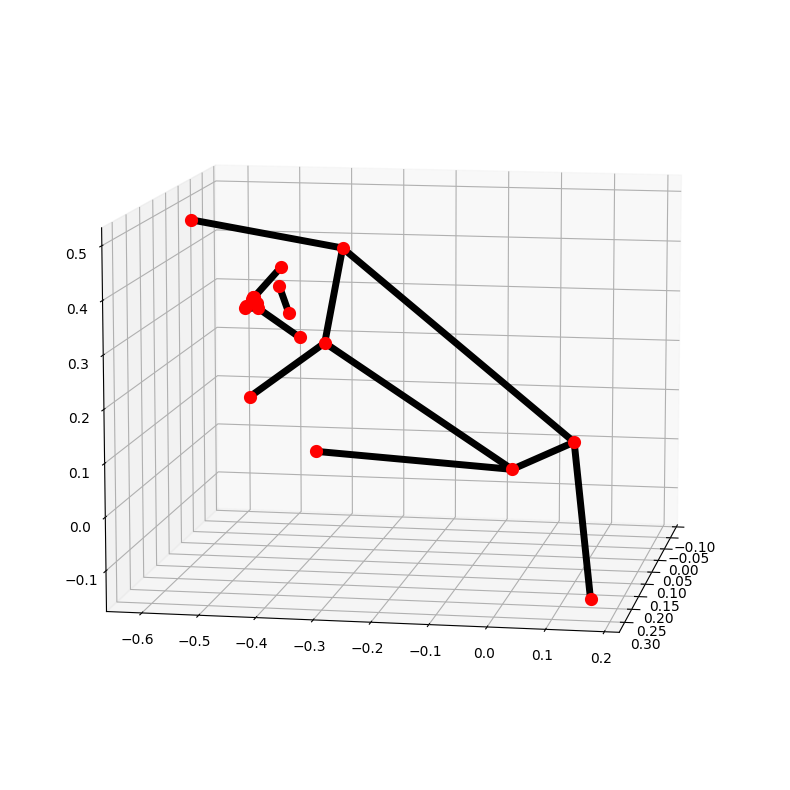

Nose coordinates: (992.3889636993408, 538.9770403504372)


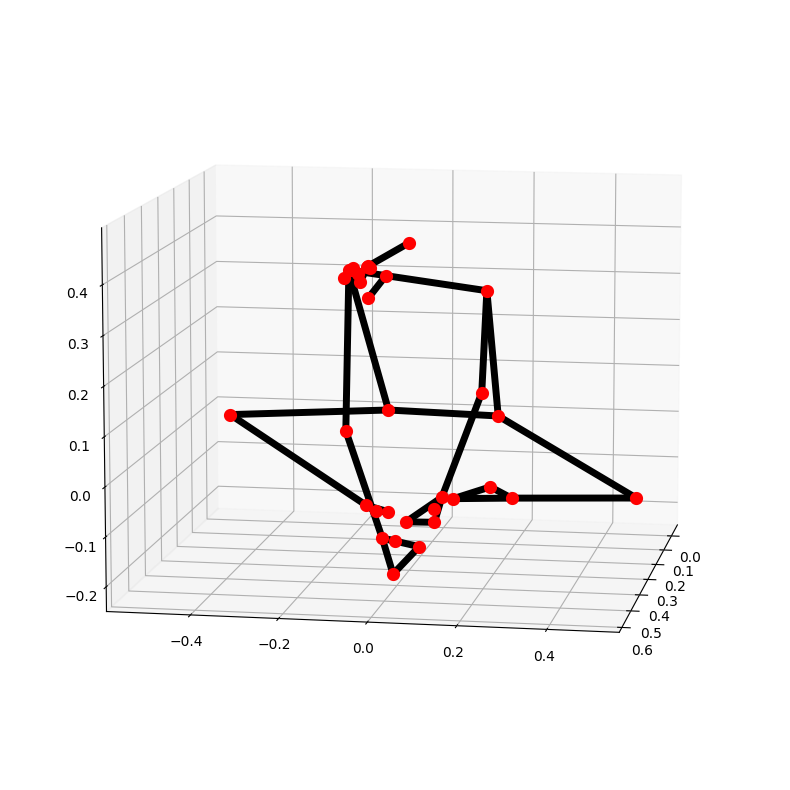

Nose coordinates: (1537.1956825256348, 640.9782618284225)


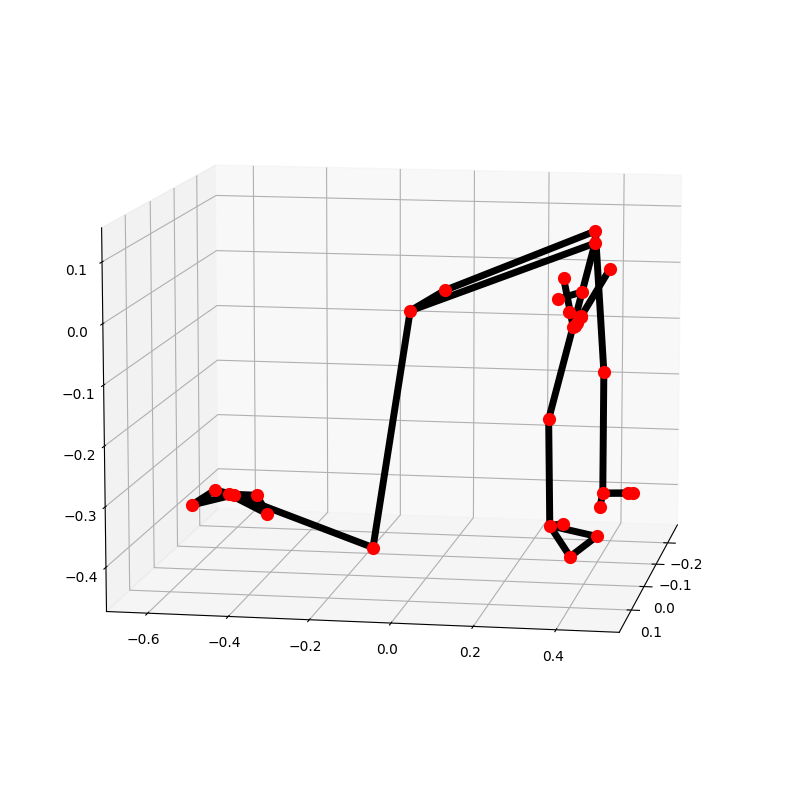

Nose coordinates: (1715.1644229888916, 320.32489851117134)


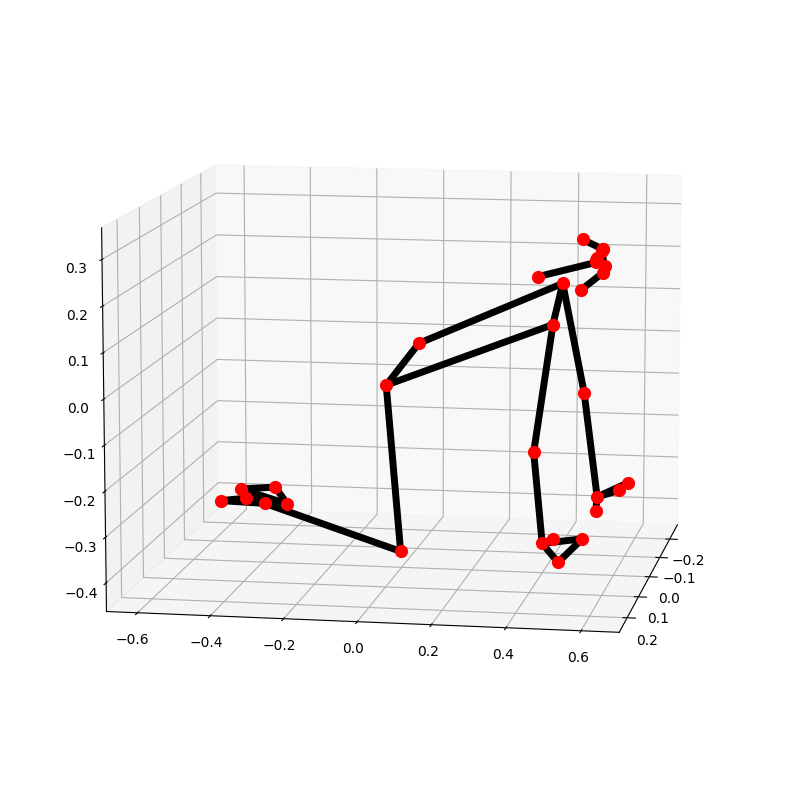

Nose coordinates: (1527.512788772583, 357.82930478453636)


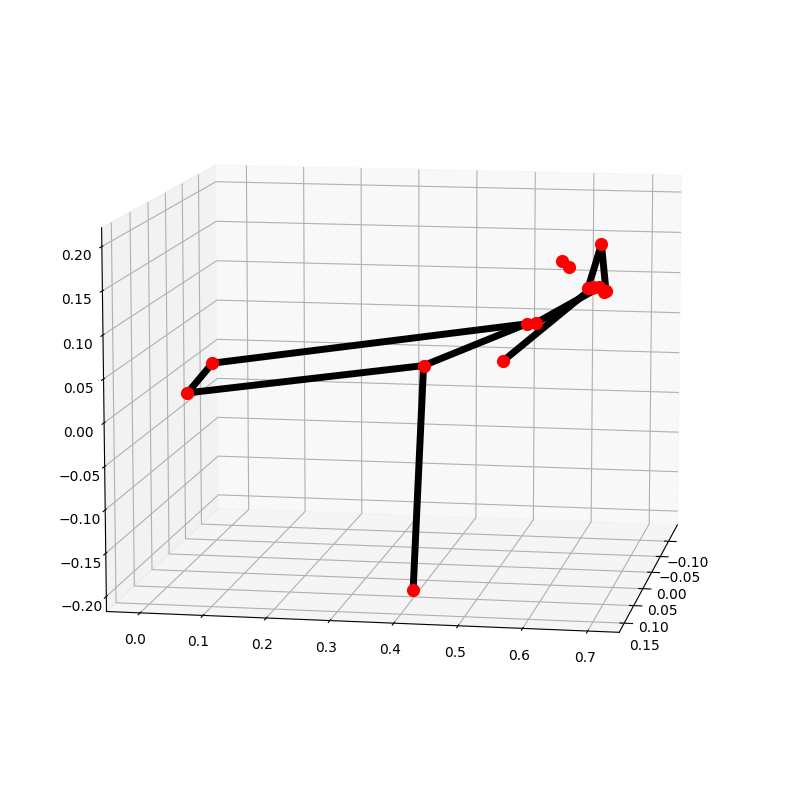

Nose coordinates: (2238.8278207182884, 1646.5971919298172)


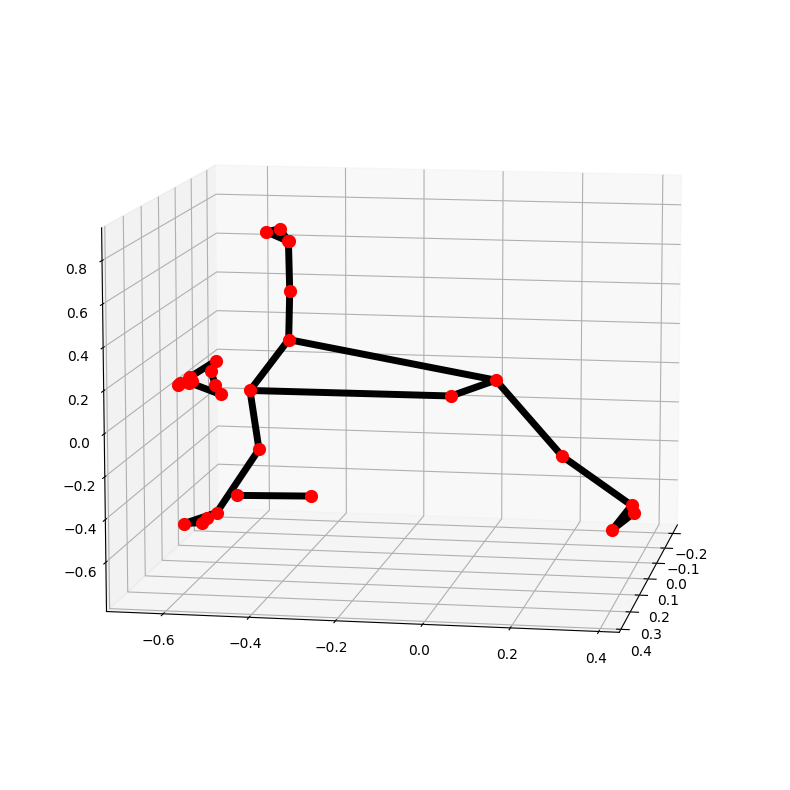

Nose coordinates: (1381.477952003479, 287.85513043403625)


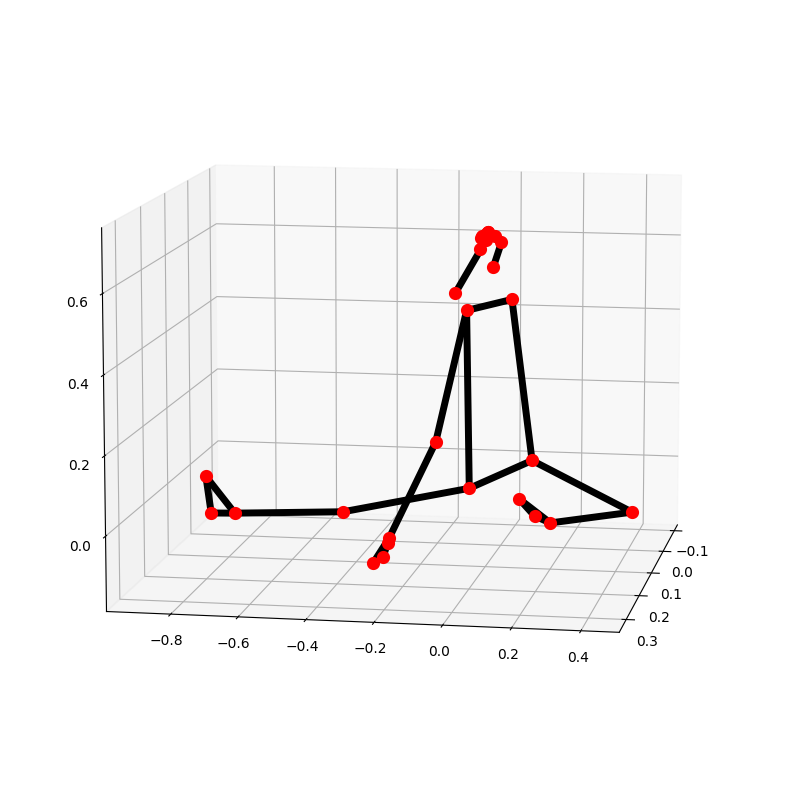

Nose coordinates: (1281.4228534698486, 273.43044355511665)


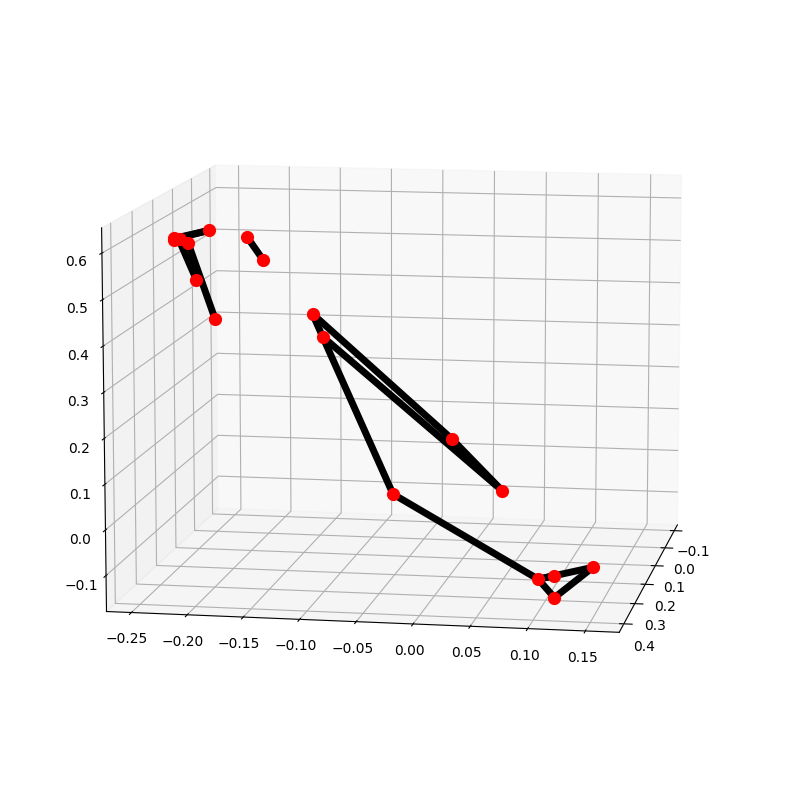

Nose coordinates: (2421.552167892456, 1111.4280891120434)


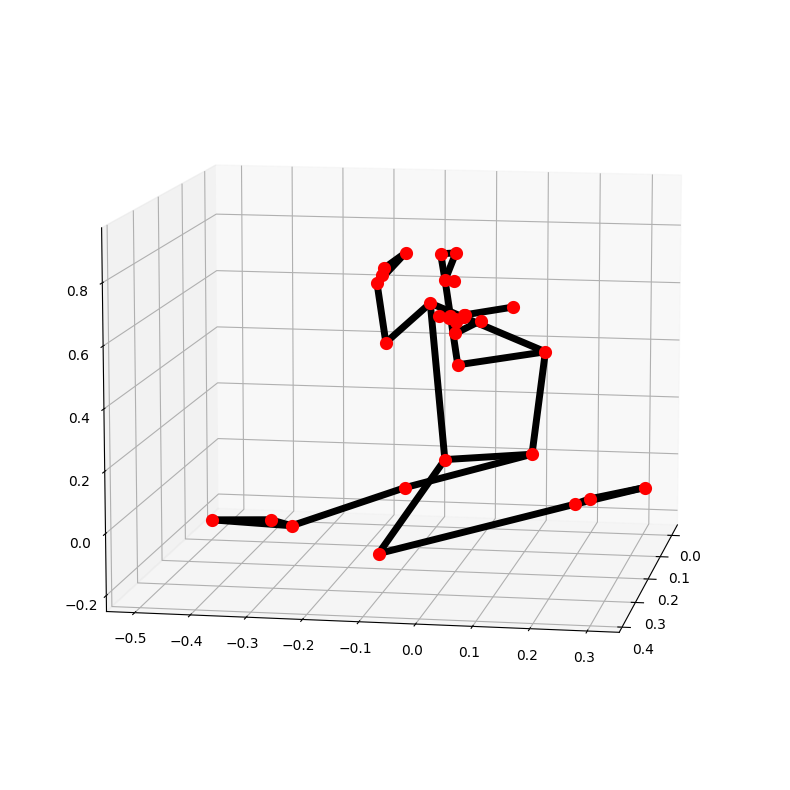

Nose coordinates: (2758.556842803955, 1011.7233991622925)


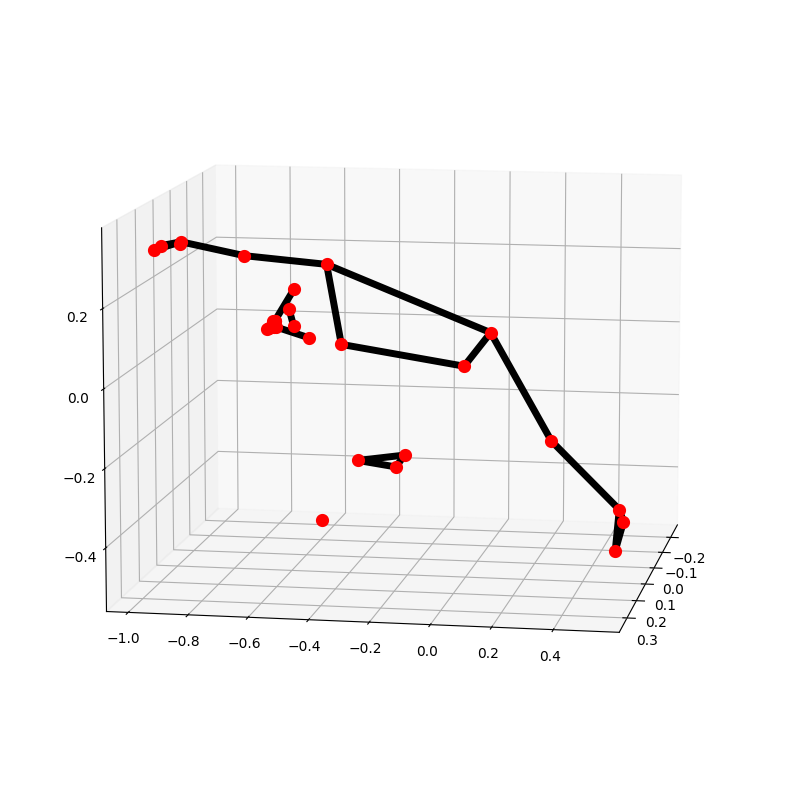

In [2]:
# For static images:
basedir = "../../testdata/human/img"
filenames = glob.glob(basedir+"/*.jpg")
IMAGE_FILES = {name: cv2.imread(name) for name in filenames}

BG_COLOR = (192, 192, 192) # gray
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
      continue
    print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
    )

    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)